#🌍**TELECOM X- ANALISIS DE EVASION DE CLIENTES**

**Bibliotecas utiliazadas:**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay,classification_report
import numpy as np


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
url = '/content/drive/MyDrive/ONE EDUCATION/datosTelecomX.csv'
datos = pd.read_csv(url)
datos.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.80


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [15]:
datos.describe(include='all')

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
count,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,...,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,male,NaN,NaN,NaN,NaN,NaN,no,fiber optic,...,no,no,no,no,month-to-month,NaN,electronic check,NaN,NaN,NaN
freq,1,NaN,3555,NaN,NaN,NaN,NaN,NaN,3390,3096,...,3095,3473,2810,2785,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.592219,NaN,64.761692,2279.734304,2.158675
std,NaN,0.441561,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491457,NaN,30.090047,2266.794470,1.003088
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.610000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.500000,398.550000,1.180000
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1394.550000,2.340000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3786.600000,2.990000


##**Explorando los datos**
Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

**NOTA: aunque este paso se realizó en la parte 1 del challenge, no esta de mas dejarlo evidenciado en este.**

In [35]:
#histograma para variables categoricas
px.histogram(datos,x = 'churn',text_auto = True)

In [38]:
px.histogram(datos,x = 'gender',text_auto = True,color='churn',barmode='group')

In [39]:
px.histogram(datos,x = 'senior_citizen',text_auto = True,color='churn',barmode='group')

In [40]:
px.histogram(datos,x = 'partner',text_auto = True,color='churn',barmode='group')

In [42]:
px.histogram(datos,x = 'dependents',text_auto = True,color='churn',barmode='group')

In [44]:
px.histogram(datos,x = 'contract',text_auto = True,color='churn',barmode='group')

In [45]:
px.histogram(datos,x = 'payment_method',text_auto = True,color='churn',barmode='group')

In [47]:
px.box(datos,x='tenure',color='churn')

In [49]:
px.box(datos,x='charges_monthly',color='churn')

In [51]:
px.box(datos,x='charges_total',color='churn')

In [53]:
px.box(datos,x='charges_daily',color='churn')

##**Eliminación de Columnas Irrelevantes**

In [16]:
datos = datos.drop(columns='customer_id', axis=1)

In [17]:
datos

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
0,0,female,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,65.60,593.30,2.19
1,0,male,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,59.90,542.40,2.00
2,1,male,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,73.90,280.85,2.46
3,1,male,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,98.00,1237.85,3.27
4,1,female,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,female,0,0,0,13,1,no,dsl,yes,...,no,yes,no,no,one year,0,mailed check,55.15,742.90,1.84
7039,1,male,0,1,0,22,1,yes,fiber optic,no,...,no,no,no,yes,month-to-month,1,electronic check,85.10,1873.70,2.84
7040,0,male,0,0,0,2,1,no,dsl,no,...,no,no,no,no,month-to-month,1,mailed check,50.30,92.75,1.68
7041,0,male,0,1,1,67,1,no,dsl,yes,...,yes,yes,no,yes,two year,0,mailed check,67.85,4627.65,2.26


##**Encoding**

In [18]:
#Aplicamos una funcion la cual nos regresara los valores unicos de los datos que nos ayudara a saber realiaar de buena manera el encoding
#nota el ";" ayuda que solo imprima nuestro resulado y no el de el apply
datos.apply(lambda x: print(f'{x.name}\n{x.unique()}'));

churn
[0 1]
gender
['female' 'male']
senior_citizen
[0 1]
partner
[1 0]
dependents
[1 0]
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_service
[1 0]
multiple_lines
['no' 'yes' 'no phone service']
internet_service
['dsl' 'fiber optic' 'no']
online_security
['no' 'yes' 'no internet service']
online_backup
['yes' 'no' 'no internet service']
device_protection
['no' 'yes' 'no internet service']
tech_support
['yes' 'no' 'no internet service']
streaming_tv
['yes' 'no' 'no internet service']
streaming_movies
['no' 'yes' 'no internet service']
contract
['one year' 'month-to-month' 'two year']
paperless_billing
[1 0]
payment_method
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
charges_monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
charges_total
[ 593.3   542.4 

In [21]:
datos['gender'] = datos['gender'].replace({'female': 0, 'male': 1})

In [22]:
categoricas = [
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'contract',
    'payment_method'
]
#Aplicar Encoding
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)

In [23]:
datos_codificados

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,...,streaming_movies_no,streaming_movies_no internet service,streaming_movies_yes,contract_month-to-month,contract_one year,contract_two year,payment_method_bank transfer (automatic),payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check
0,0,0,0,1,1,9,1,1,65.60,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.90,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.90,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.00,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.90,267.40,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,55.15,742.90,...,1,0,0,0,1,0,0,0,0,1
7039,1,1,0,1,0,22,1,1,85.10,1873.70,...,0,0,1,1,0,0,0,0,1,0
7040,0,1,0,0,0,2,1,1,50.30,92.75,...,1,0,0,1,0,0,0,0,0,1
7041,0,1,0,1,1,67,1,0,67.85,4627.65,...,0,0,1,0,0,1,0,0,0,1


##**Verificación de la Proporción de Cancelación (Churn)**

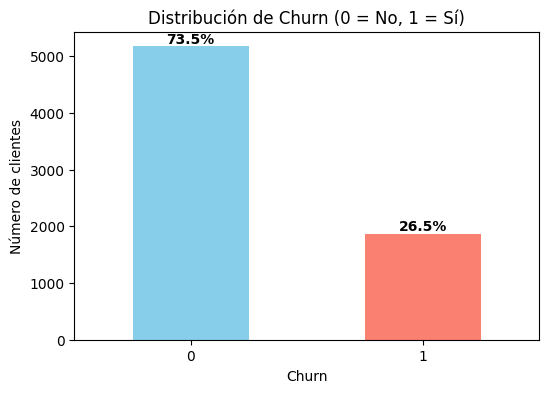

In [28]:

conteo_churn = datos_codificados['churn'].value_counts()
# Realización de gráfico para mayor visualización
plt.figure(figsize=(6,4))
ax = conteo_churn.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Churn (0 = No, 1 = Sí)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)

total = conteo_churn.sum()
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(porcentaje,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

**Al analizar la distribución de la variable churn, encontramos que:**

- 73.5% de los clientes permanecen activos (no cancelaron).

- 26.5% de los clientes cancelaron sus servicios.

Esto indica que las clases están desbalanceadas, ya que hay aproximadamente 3 clientes que permanecen por cada 1 que cancela.

##**Balanceo de Clases**



Al analizar la variable *churn*, observamos un **desbalance importante**:  
- 73.5% de los clientes permanecen activos (no cancelaron).  
- 26.5% de los clientes cancelaron.

Por ello decidimos en realizar un balanceo de las clases con la técnica **SMOTE (Synthetic Minority Over-sampling Technique)** es una técnica de oversampling que genera **nuevos ejemplos sintéticos de la clase minoritaria** (churn = 1) interpolando entre instancias existentes.  

In [55]:
#Separacion de variables
X = datos_codificados.drop(columns=['churn'])
y = datos_codificados['churn']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_balanceada, y_balanceada = smote.fit_resample(X, y)

y_balanceada.value_counts(normalize =True)

,proportion
churn,
0,0.5
1,0.5


###**Normalización o Estandarización**

<Figure size 1000x600 with 0 Axes>

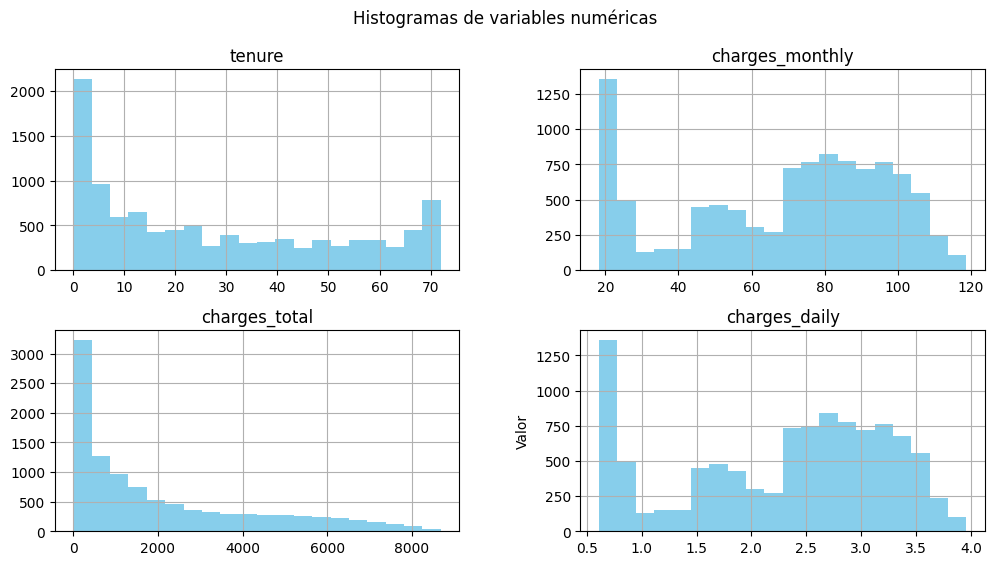

In [62]:
#Columnas numericas
num_cols = ['tenure', 'charges_monthly', 'charges_total', 'charges_daily']

# Boxplots para comparar escalas
plt.figure(figsize=(10,6))
X_balanceada[num_cols].hist(figsize=(12,6), bins=20, color='skyblue')
plt.suptitle("Histogramas de variables numéricas")
plt.ylabel("Valor")
plt.show()

Antes de seguir con el analisis para la normalización coomo se puede obvserar en los histogramas  nos encontramos con el detalle que el de cargas diarias y mensuales es el mismo, cambiando unicamente la escala, por ello antes de seguir con el analisis se tomará la decision de eliminar la casilla de cargos diarios, ademas recordando que fue calculada a raiz de la mensual.

In [63]:
X_balanceada.drop(columns='charges_daily',inplace=True,axis=1)

In [64]:
X_balanceada.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'paperless_billing', 'charges_monthly',
       'charges_total', 'multiple_lines_no', 'multiple_lines_no phone service',
       'multiple_lines_yes', 'internet_service_dsl',
       'internet_service_fiber optic', 'internet_service_no',
       'online_security_no', 'online_security_no internet service',
       'online_security_yes', 'online_backup_no',
       'online_backup_no internet service', 'online_backup_yes',
       'device_protection_no', 'device_protection_no internet service',
       'device_protection_yes', 'tech_support_no',
       'tech_support_no internet service', 'tech_support_yes',
       'streaming_tv_no', 'streaming_tv_no internet service',
       'streaming_tv_yes', 'streaming_movies_no',
       'streaming_movies_no internet service', 'streaming_movies_yes',
       'contract_month-to-month', 'contract_one year', 'contract_two year',
       'payment_method_bank transfer (autom

<Figure size 1000x600 with 0 Axes>

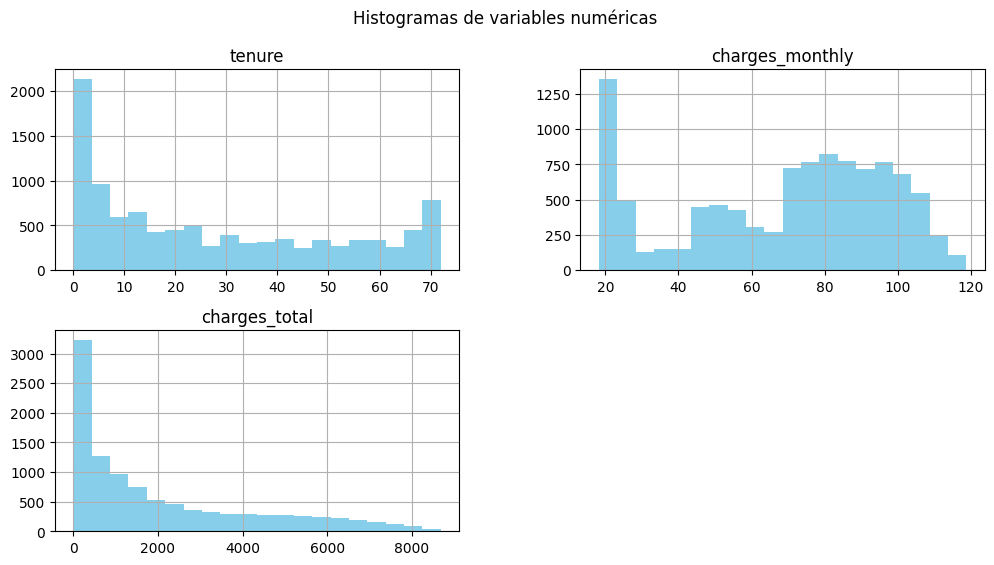

In [65]:
#Columnas numericas
num_cols = ['tenure', 'charges_monthly', 'charges_total']

# Boxplots para comparar escalas
plt.figure(figsize=(10,6))
X_balanceada[num_cols].hist(figsize=(12,6), bins=20, color='skyblue')
plt.suptitle("Histogramas de variables numéricas")
plt.ylabel("Valor")
plt.show()

In [70]:
normalizacion =MinMaxScaler()
X_normalizada = normalizacion.fit_transform(X_balanceada)

#**Análisis de Correlación**

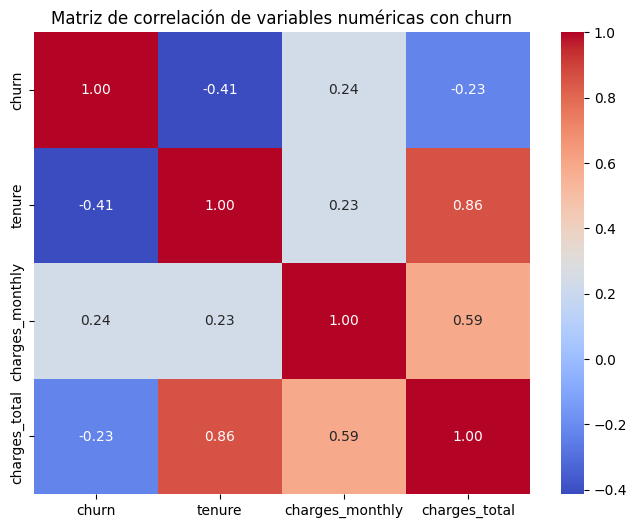

In [75]:

num_cols = ['tenure', 'charges_monthly', 'charges_total']

# Calcular matriz de correlación
corr_matrix =pd.concat([y_balanceada,X_balanceada[num_cols]],axis=1)
corr_matrix = corr_matrix.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de correlación de variables numéricas con churn")
plt.show()

##**Análisis Dirigido**


In [84]:
px.box(X_balanceada,x='tenure',color=y_balanceada)

In [82]:
px.box(X_balanceada,x='charges_total',color=y_balanceada)

##**Separación de Datos**

In [96]:
# Separación en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceada, y_balanceada, test_size=0.2, random_state=42, stratify=y_balanceada
)


##🤖**Creación de Modelos**

In [105]:
#Normalizamos los datos para el modelo de regresion logistica
normalizacion = MinMaxScaler()
X_train_norm = normalizacion.fit_transform(X_train)
X_test_norm = normalizacion.transform(X_test)

# Modelo1: Regresión Logística
modelo_1 = LogisticRegression(random_state=42)
modelo_1.fit(X_train_norm, y_train)

# Predicciones
y_pred_m1 = modelo_1.predict(X_test_norm)

Cuando trabajamos con modelos sensibles a la escala, como Regresión Logística la normalización garantiza que todas las variables contribuyan de manera equivalente al cálculo del modelo.
Variables con magnitudes mayores (charges_total) pueden dominar el cálculo de distancias o la optimización de parámetros.

Esto genera sesgo en los coeficientes o en la medida de similitud entre datos, afectando el rendimiento y la interpretación.

In [104]:
#Modelo 2: Random Forest
modelo_2 = RandomForestClassifier(max_depth=10,random_state=42)
modelo_2.fit(X_train, y_train)  # No normalizamos

# Predicciones
y_pred_m2 = modelo_2.predict(X_test)

##**Evaluación de los Modelos**

In [138]:
# Función para evaluar modelos
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"=== {nombre_modelo} ===")
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("Matriz de Confusión:")
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=['Permaneciò','Abandonò']);


=== Regresión Logística ===

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.85      0.83      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Exactitud: 0.8415
Precisión: 0.8469
Recall: 0.8338
F1-score: 0.8403
Matriz de Confusión:


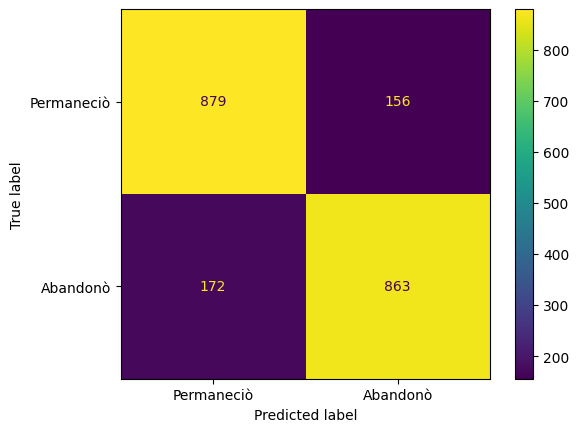

In [139]:
# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_m1, "Regresión Logística")

=== Random Forest ===

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1035
           1       0.83      0.89      0.86      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Exactitud: 0.8522
Precisión: 0.8275
Recall: 0.8899
F1-score: 0.8575
Matriz de Confusión:


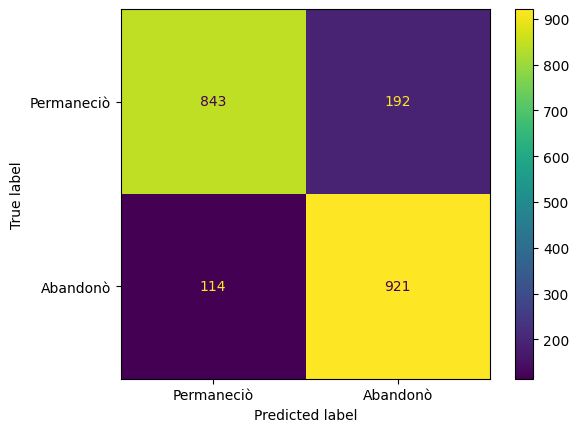

In [140]:
# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_m2, "Random Forest")

###**Análisis Comparativo de Modelos**

####Desempeño General
- **Modelo 1 (Regresión Logística)**
  - Exactitud: **0.84**
  - Precisión: **0.8469**
  - Recall: **0.83**
  - F1-score: **0.840**
  - Matriz de confusión: equilibrio razonable, aunque tiende a confundir más positivos reales como negativos (172 falsos negativos).

- **Modelo 2(Random Forest)**
  - Exactitud: **0.85**
  - Precisión: **0.828**
  - Recall: **0.8890**
  - F1-score: **0.858**
  - Matriz de confusión: mayor recall (detecta mejor los casos positivos), aunque sacrifica algo de precisión (192 falsos positivos).

**Conclusión:**  
El **Modelo 2** tuvo el mejor desempeño general, especialmente en **recall y F1-score**, lo que lo hace más balanceado cuando se busca detectar correctamente la clase positiva.

---
####**Overfitting y Underfitting**
- **Regresión Logística**  
  - Modelo lineal, menos flexible.  
  - Resultados estables y sin señales claras de overfitting.  
  - Puede estar en un punto **ligero de underfitting**, ya que no capta toda la complejidad de los datos (recall algo más bajo).  
  -Ajustes posibles: añadir interacciones de variables o probar regularización más flexible.

- **Random Forest**  
  - Ligeramente mejor en test que la regresión logística, pero su **recall alto frente a precisión más baja** puede indicar que clasifica demasiados como positivos.  
  - Ajustes posibles: reducir la profundidad de los árboles.


##**Análisis de la Importancia de las Variables**

In [155]:
# Importancia de variables del Regresion logistica
importancias = modelo_1.coef_[0]

df_importancia = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": importancias
}).sort_values(by="Coeficiente", ascending=False)

df_importancia

,Variable,Coeficiente
8,charges_total,2.825931
7,charges_monthly,1.244890
6,paperless_billing,0.216560
5,phone_service,0.181040
13,internet_service_fiber optic,0.127073
1,senior_citizen,0.068571
2,partner,-0.152857
0,gender,-0.192558
12,internet_service_dsl,-0.339145
3,dependents,-0.393839


In [151]:
# Importancia de variables del Random Forest
importancias = modelo_2.feature_importances_
indices = np.argsort(importancias)[::-1]

df_importancia = pd.DataFrame({
    "Variable": X.columns[indices],
    "Importancia": importancias[indices]
})

df_importancia

,Variable,Importancia
0,tenure,0.102898
1,streaming_movies_yes,0.101218
2,charges_total,0.075438
3,contract_one year,0.067458
4,online_security_no internet service,0.058750
5,tech_support_no internet service,0.055451
6,charges_monthly,0.053475
7,contract_month-to-month,0.050696
8,internet_service_dsl,0.039136
9,multiple_lines_yes,0.026053


##**Informe de Resultados: Factores de Cancelación y Estrategias de Retención**


1.**Introducción**

El objetivo del análisis fue identificar los principales factores que influyen en la cancelación de clientes y evaluar diferentes modelos de Machine Learning para predecirla. Se compararon la Regresión Logística y el Random Forest, midiendo métricas de desempeño como exactitud, precisión, recall, F1-score y la matriz de confusión.

2**Principales Factores que Influyen en la Cancelación**

De acuerdo con el análisis de las variables más relevantes (feature importance en Random Forest y coeficientes en Regresión Logística), los factores con mayor impacto en la probabilidad de cancelación fueron:

- ***Meses de permanencia del cliente (tenure):*** los coeficientes de la Regresión Logística (–4.20) y la importancia en Random Forest (0.10) confirmaron que a menor tiempo en la empresa, mayor probabilidad de cancelar.

- ***Cargos y facturación:*** charges_total (+2.82 en Logística, 0.075 en RF) y charges_monthly (+1.24 en Logística, 0.053 en RF) muestran que los clientes con facturas elevadas presentan mayor riesgo de churn.

- ***Método de pago:*** la Regresión Logística señaló que métodos como electronic check (+2.65) aumentan el churn.En cambio, pagos automáticos con tarjeta o transferencia (–3.14 a –3.27) reducen significativamente la cancelación.
- ***Tipo de contrato:*** los contratos mes a mes (+1.38 en Logística, 0.05 en RF) incrementan la probabilidad de churn.Los contratos a uno o dos años reducen fuertemente la cancelación (coef. negativos de –2.16 y –2.68).


3.**Rendimiento de los Modelos**

- Regresión Logística:

  - Acurácia: 0.84

  - Precisión: 0.847

  - Recall: 0.834

Modelo estable, con resultados consistentes y buena interpretabilidad para identificar factores clave.

- Random Forest:

  - Acurácia: 0.85

  - Recall: 0.890 (mayor capacidad de identificar clientes que cancelan).

  - F1-score: 0.858 (mejor balance entre precisión y recall).

Permite analizar la importancia de variables, confirmando que permanencia, tipo de contrato, facturación y servicios adicionales son determinantes.

5.**Conclusión**
El modelo de Random Forest demostró ser más eficaz para detectar a clientes con riesgo de cancelar, mientras que la Regresión Logística aporta interpretabilidad clara para la toma de decisiones.

La aplicación de estrategias de retención basadas en los factores clave permitirá reducir significativamente la tasa de cancelación y mejorar la fidelización a largo plazo.

Dado que el modelo 2 (Random Forest) decidimos exportarlo para su uso como el ganador.

In [156]:
import pickle

try:
  with open('modelo_champion.pkl', 'wb') as file:
    pickle.dump(modelo_2, file)
  print('¡Modelo guardado con éxito!!!')
except Exception as e:
  print('Ocurrió un error al guardar el modelo: ', str(e))

¡Modelo guardado con éxito!!!
